<a href="https://colab.research.google.com/github/adhiljuvane/Vegetable-Identifier/blob/main/Vegetable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai
print(fastai.__version__)

In [27]:
from fastai.vision.all import *

In [18]:
#Not working
import zipfile
!unzip /content/Vegetable Images.zip

unzip:  cannot find or open /content/Vegetable, /content/Vegetable.zip or /content/Vegetable.ZIP.


In [10]:
mv "/content/"*".jpg" "/content/Vegetables/train/Potato"

In [39]:
vegetables = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
    )

In [40]:
path = Path("/content/Vegetables")
dataLoaders = vegetables.dataloaders(path)

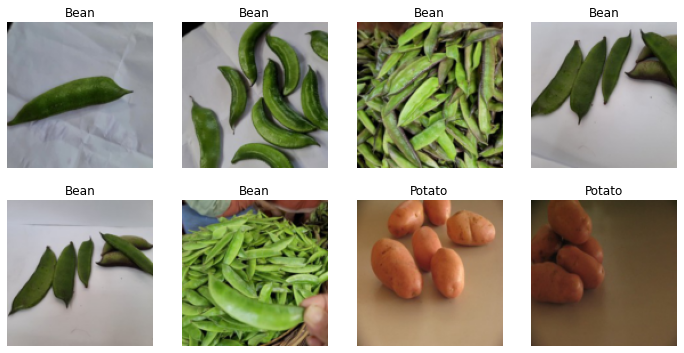

In [32]:
dataLoaders.valid.show_batch(max_n=8, nrows=2)

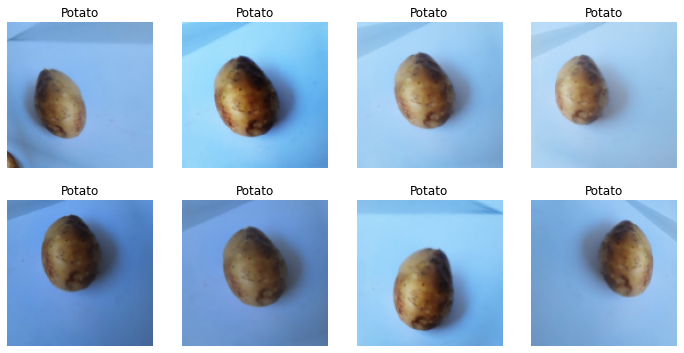

In [41]:
vegetables = vegetables.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dataLoaders = vegetables.dataloaders(path)
dataLoaders.train.show_batch(max_n=8, nrows=2, unique=True)

In [42]:
vegtables = vegetables.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dataLoaders = vegetables.dataloaders(path)

In [43]:
learn = cnn_learner(dataLoaders, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.691607,0.027718,0.000000,01:00


epoch,train_loss,valid_loss,error_rate,time
0,0.023864,0.002196,0.000000,01:23
1,0.019173,0.012975,0.012500,01:22
2,0.013019,0.011219,0.012500,01:22
3,0.009389,0.008188,0.000000,01:23


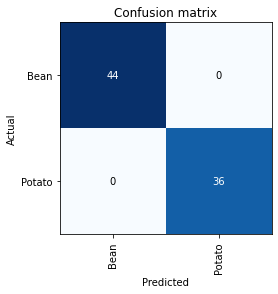

In [44]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [45]:
learn.export()

In [47]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [48]:
learn_inf = load_learner(path/'export.pkl')

In [49]:
learn_inf.predict('/content/0001.jpg')

('Bean', TensorBase(0), TensorBase([1.0000e+00, 6.8979e-07]))

In [51]:
learn_inf.dls.vocab

['Bean', 'Potato']

In [ ]:
pip install ipywidgets

In [57]:
import ipywidgets as widgets

In [58]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [59]:
img = PILImage.create(btn_upload.data[-1])

In [60]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [61]:
pred,pred_idx,probs = learn_inf.predict(img)

In [62]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Bean; Probability: 1.0000')

In [63]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [64]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(128,128))
  pred,pred_idx,probs = learn_inf.predict(img)
  lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)


In [69]:
widgets.VBox([widgets.Label('Select Vegetable'), btn_upload, btn_run, out_pl, lbl_pred])

In [70]:
!pip install voila
!jupiter serverectension enable voila --sys-prefix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 13.7 MB/s 
     |████████████████████████████████| 563 kB 59.1 MB/s 
     |████████████████████████████████| 112 kB 75.7 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 344 kB 76.0 MB/s 
     |████████████████████████████████| 70 kB 9.0 MB/s 
     |████████████████████████████████| 423 kB 86.7 MB/s 
     |████████████████████████████████| 59 kB 7.8 MB/s 
     |████████████████████████████████| 55 kB 3.9 MB/s 
     |████████████████████████████████| 80 kB 10.1 MB/s 
     |████████████████████████████████| 133 kB 70.3 MB/s 
     |████████████████████████████████| 86 kB 4.6 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: jinja2
    Found existing installati

/bin/bash: jupiter: command not found
